In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Raw Data ##

In [ ]:
import pandas as pd
df = pd.read_csv("../data/raw/raw_MC.csv")
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Cleaning Data #

## Checking for null-values ##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**No null values** found in any column!

## Ranges and Unique Values in each column ##

In [ ]:

print(f'Age Range: {df.age.min()}','to',df.age.max()) #Values are appropriate 
print(f'BMI Range: {df.bmi.min()}','to',df.bmi.max()) #Values are appropriate 
print(f'Unique values in "Children": {df.children.unique()}') #Values are appropriate
print(f'Unique values in "Sex": {df.sex.unique()}') #Values are appropriate
print(f'Unique values in "Smoker": {df.smoker.unique()}') #Values are a little ambiguous; yes = smoker, no = non-smoker
print(f'Unique values in "Region": {df.region.unique()}') #Values are clear and understandable


Age Range: 18 to 64
BMI Range: 15.96 to 53.13
Unique values in "Children": [0 1 3 2 5 4]
Unique values in "Sex": ['female' 'male']
Unique values in "Smoker": ['yes' 'no']
Unique values in "Region": ['southwest' 'southeast' 'northwest' 'northeast']


**All values** are appropriate, accurate and there is no outright redundancy in them. They can be used for analysis.

## Identifying Outliers and removing them from the dataframe ##

Total number of outliers are 7


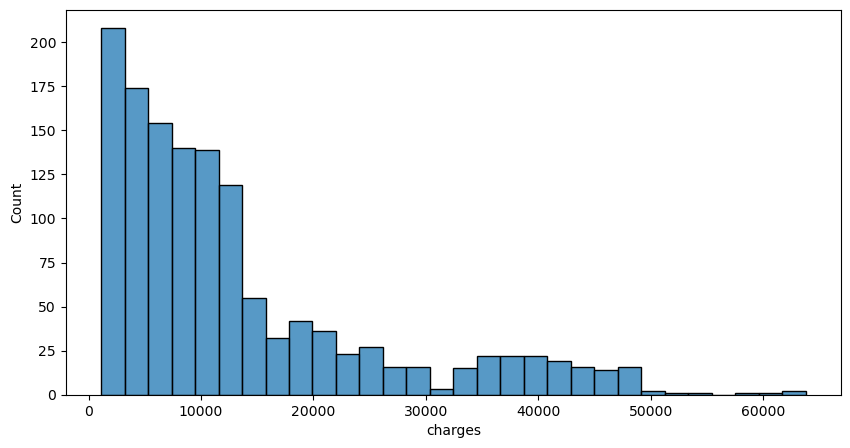

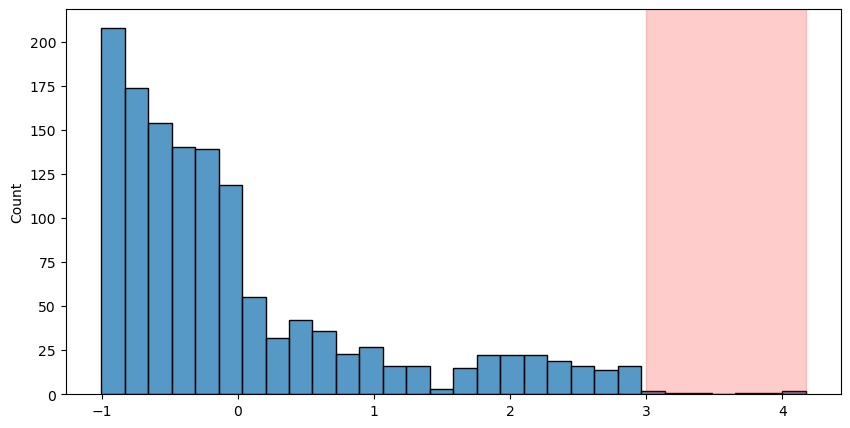

In [ ]:
plt.figure(figsize = (10,5))
sns.histplot(df['charges'])

def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

out_zscore(df.charges)

plt.figure(figsize = (10,5))
sns.histplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')
df = df[(df['charges'] < 3) | (df['charges'] > -3)]

## Correlation Matrix ##

            age    sex    bmi  children  smoker  region  charges
age       1.000 -0.021  0.109     0.042   0.025  -0.002    0.299
sex      -0.021  1.000  0.046     0.017  -0.076  -0.005    0.057
bmi       0.109  0.046  1.000     0.013  -0.004  -0.158    0.198
children  0.042  0.017  0.013     1.000  -0.008  -0.017    0.068
smoker    0.025 -0.076 -0.004    -0.008   1.000  -0.002   -0.787
region   -0.002 -0.005 -0.158    -0.017  -0.002   1.000    0.006
charges   0.299  0.057  0.198     0.068  -0.787   0.006    1.000


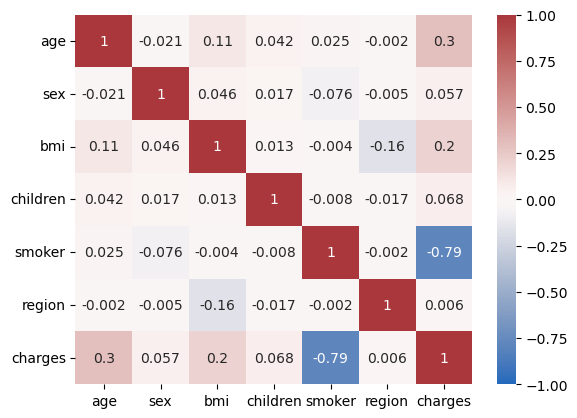

In [ ]:
#Creating function to provide numerical keys for categorical data
def clean(x):
    x = x.replace("female","0").replace("male","1")
    return int(x)
def clean2(x):
    x = x.replace("yes","0").replace("no","1")
    return int(x)
def clean3(x):
    x = x.replace("southwest","0").replace("southeast","1").replace("northwest","2").replace("northeast","3")
    return int(x)
#Converting all data into numerical types
df2 = df.copy()
df2['sex'] = df2['sex'].apply(clean) 
df2['smoker'] = df2['smoker'].apply(clean2)
df2['region'] = df2['region'].apply(clean3)

corr = df2.corr().round(3)
print(corr)
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()


### General correlations ###
- Smoking has a strong negative correlation with the insurance charges (Medical costs billed tend to be lower for beneficiaries who are non-smokers)
- Age has a slight positive correlation with the insurance charges (Medical costs billed tend to be higher for beneficiaries who are older)
- BMI has a slight positive correlation with the insurance charges (Medical costs billed tend to be higher for beneficiaries with a higher BMI)
